# Import Data

In [129]:
import pyabf
import matplotlib.pyplot as plt
import peakutils
import chart_studio.plotly as py
# from chart_studio.tools import FigureFactory as FF
import numpy as np
import pandas as pd
import scipy
peakTimes = pd.read_excel ('/Users/xusy/Data/JurgaRecordings/spike-peak-time-by-type.xlsx')
abfPath1 = '/Users/xusy/Data/JurgaRecordings/18215001.abf'
abfPath3 = '/Users/xusy/Data/JurgaRecordings/18424003.abf'
abfPath5 = '/Users/xusy/Data/JurgaRecordings/18221005.abf'

imagepath = '/Users/xusy/Data/JurgaRecordings/'


abf1 = pyabf.ABF(abfPath1)
abf3 = pyabf.ABF(abfPath3)
abf5 = pyabf.ABF(abfPath5)

print(abfPath1)

abf1.setSweep(0)
print(abf1.sweepY) # sweep data (ADC)
print(abf1.sweepC) # sweep command (DAC)
print(abf1.sweepX) # sweep times (seconds)


print(abfPath3)
abf3.setSweep(0)
print(abf3.sweepY) # sweep data (ADC)
print(abf3.sweepC) # sweep command (DAC)
print(abf3.sweepX) # sweep times (seconds)

print(abfPath5)
abf3.setSweep(0)
print(abf5.sweepY) # sweep data (ADC)
print(abf5.sweepC) # sweep command (DAC)
print(abf5.sweepX) # sweep times (seconds)




/Users/xusy/Data/JurgaRecordings/18215001.abf
[-363.4644 -372.6196 -347.29   ...    5.4932    0.6104   -8.5449]
[0. 0. 0. ... 0. 0. 0.]
[  0.       0.0001   0.0001 ... 212.9999 212.9999 213.    ]
/Users/xusy/Data/JurgaRecordings/18424003.abf
[-103.7598  -95.52    -95.8252 ... -127.2583 -127.8687 -126.3428]
[0. 0. 0. ... 0. 0. 0.]
[  0.       0.0001   0.0001 ... 220.5999 220.5999 220.6   ]
/Users/xusy/Data/JurgaRecordings/18221005.abf
[-149.8413 -132.7515 -140.3809 ... -111.9995  -86.6699  -85.4492]
[0. 0. 0. ... 0. 0. 0.]
[  0.       0.0001   0.0001 ... 284.9499 284.9499 284.95  ]


# Plot a segment of the .abi files

Not doing much with it yet but imagine we can do something with these raw traces. Can discuss further.

Text(0.5, 6.0, 'Time')

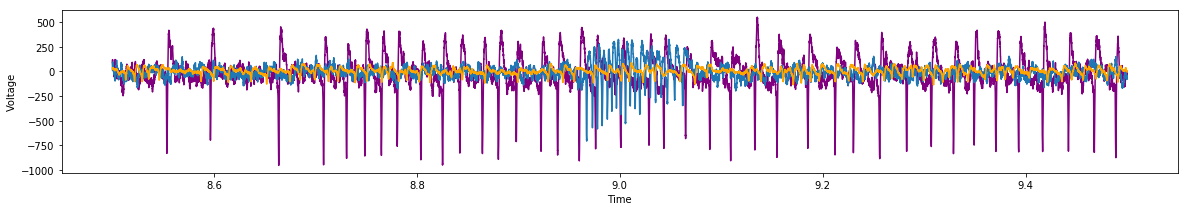

In [131]:
timeRange=range(170000,190000)


plt.figure(figsize=(20, 3), facecolor=None)
plt.plot(abf5.sweepX[timeRange], abf5.sweepY[timeRange], 'purple')
plt.plot(abf1.sweepX[timeRange], abf1.sweepY[timeRange])
plt.plot(abf3.sweepX[timeRange], abf3.sweepY[timeRange], 'orange')
plt.savefig(imagepath + 'segment.png', dpi=100, transparent=True, bbox_inches='tight')
plt.savefig(imagepath + 'segment.svg',transparent=True, bbox_inches='tight')
plt.ylabel('Voltage')
plt.xlabel('Time')






# Spike data: plot raster and histogram for ISI

/Users/xusy/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:789: RuntimeWarning:

invalid value encountered in true_divide



no max
no max


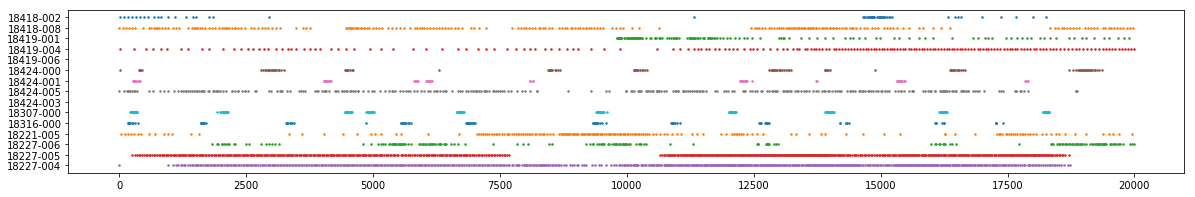

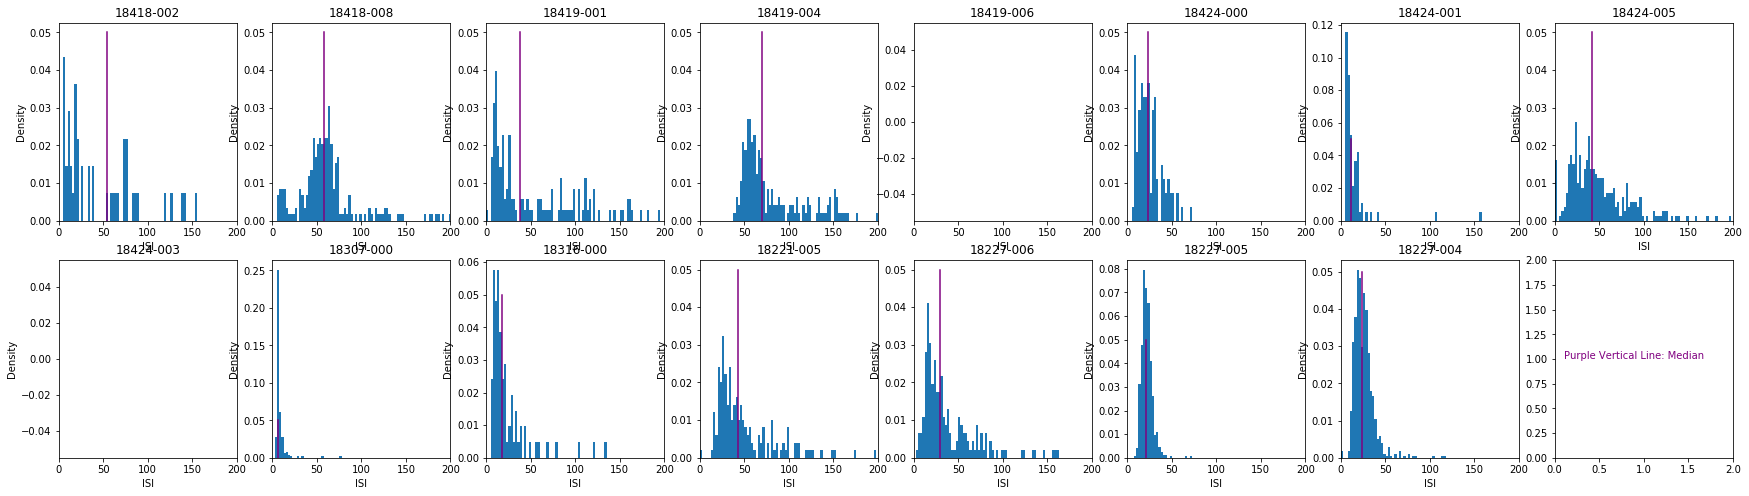

In [143]:

raster=plt.figure(figsize=(20, 3), facecolor=None)

cutOffPoint=20000
for i in range(0, len(peakTimes.columns)):
    timestamps=peakTimes.loc[peakTimes[peakTimes.columns[i]]<cutOffPoint, peakTimes.columns[i]]
    plt.plot(timestamps, (len(peakTimes.columns)-i)*np.ones(len(timestamps)), '.', markerSize=3)
plt.yticks(range(1, len(peakTimes.columns)+1), peakTimes.columns[::-1])
plt.savefig(imagepath + 'raster.png', dpi=100, transparent=True, bbox_inches='tight')
plt.savefig(imagepath + 'raster.svg',transparent=True, bbox_inches='tight')


histogram= plt.figure(figsize=(30, 8), facecolor=None)
for i in range(0, len(peakTimes.columns)):
    timestamps=peakTimes.loc[peakTimes[peakTimes.columns[i]]<cutOffPoint, peakTimes.columns[i]]
    diffTimeStamps = np.diff(timestamps)
    a=plt.subplot(2, 8, i+1)
    plt.hist(diffTimeStamps, bins=np.linspace(0,1000,400), density=True)
    a.set_xlim([0, 200])
    a.set_ylabel('Density')
    a.set_xlabel('ISI')
    a.set_title(peakTimes.columns[i])
    try:
        plt.plot([np.max(diffTimeStamps), np.max(diffTimeStamps)], [0, 0.05])
        plt.plot([np.nanmedian(diffTimeStamps), np.nanmedian(diffTimeStamps)], [0, 0.05], 'purple')

    except:
        print('no max')
        
legendbox= plt.subplot(2, 8, 16)    
plt.text(0.1, 1, 'Purple Vertical Line: Median', color='purple')
legendbox.set_xlim([0, 2])
legendbox.set_ylim([0, 2])

plt.savefig(imagepath + 'hist.png', dpi=100, transparent=True, bbox_inches='tight')
plt.savefig(imagepath + 'hist.svg',transparent=True, bbox_inches='tight')




It looks like '18424-000', '18424-001', '18307-000', '18316-000' are bursty looking. 
From the histogram of ISI, they also have a peak at short ISI. Some seem bimodal, such as '18424-000' and '18318-000'

Note: 
raster plot is cut off at 20000 so we can still see dots. the actual data is longer
ISI is cut off at 200 so we can see if there are 2 modes. the actual distributions are wider
